# Objective

The goal here was to predict peoples' ages based on their music interests. First I used pandas to read in the csv file and saved it as the variable bdf as a dataframe. Next I created a new dataframe called df that contained only the columns I needed to use. Finally, I displayed the top 10 rows of the dataframe df.

In [1837]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
bdf = pd.read_csv("responses.csv")
df = bdf[['Age', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']]

df.head(10)

,Age,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,20.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,19.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,20.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,22.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,20.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0
5,20.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,1.0,3.0
6,20.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,3.0,5.0,2.0
7,19.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0
8,18.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,1.0,1.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0
9,19.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,5.0,1.0,2.0


Next I listed descriptions of each column in the dataframe.

In [1838]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1003.0,20.433699,2.828840,15.0,19.0,20.0,22.0,30.0
Slow songs or fast songs,1008.0,3.328373,0.833931,1.0,3.0,3.0,4.0,5.0
Dance,1006.0,3.113320,1.170568,1.0,2.0,3.0,4.0,5.0
Folk,1005.0,2.288557,1.138916,1.0,1.0,2.0,3.0,5.0
Country,1005.0,2.123383,1.076136,1.0,1.0,2.0,3.0,5.0
Classical music,1003.0,2.956132,1.252570,1.0,2.0,3.0,4.0,5.0
Musical,1008.0,2.761905,1.260845,1.0,2.0,3.0,4.0,5.0
Pop,1007.0,3.471698,1.161400,1.0,3.0,4.0,4.0,5.0
Rock,1004.0,3.761952,1.184861,1.0,3.0,4.0,5.0,5.0
Metal or Hardrock,1007.0,2.361470,1.372995,1.0,1.0,2.0,3.0,5.0


To clean the dataframe of any missing values, I just dropped any rows that contained a null or NaN value. This way all of the remaining rows have a value for each column.

In [1839]:
df = df.dropna(axis=0, how='any')

There were fifteen different ages to choose from. To make it a little bit easier to predict and cleaner to display, I decided to group the ages into "bins". I grouped them into four groups using the pandas.cut method, and then converted those groups into category codes.

In [1840]:
df["Age_bins"] = pd.cut(df["Age"], bins=[14, 18, 22, 26, 30])
df["Age_cat"] = df["Age_bins"].cat.codes

df.head(15)

,Age,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Age_bins,Age_cat
0,20.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,"(18, 22]",1
1,19.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,"(18, 22]",1
2,20.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,"(18, 22]",1
3,22.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,"(18, 22]",1
4,20.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,"(18, 22]",1
5,20.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,4.0,3.0,4.0,4.0,5.0,3.0,1.0,3.0,"(18, 22]",1
6,20.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,...,3.0,1.0,1.0,2.0,3.0,3.0,5.0,2.0,"(18, 22]",1
7,19.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,3.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,"(18, 22]",1
9,19.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,...,2.0,4.0,4.0,4.0,4.0,5.0,1.0,2.0,"(18, 22]",1
10,19.0,3.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,...,3.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,"(18, 22]",1


# Accuracy By Chance

Here I calculated the theoretical percent accuracy by choosing the most common age group every time. It turns out by shear chance, you would have about a 61% accuracy.

In [1841]:
counts = df["Age_bins"].value_counts()

chancePercent = counts.max() / counts.sum() * 100
chancePercent = round(chancePercent, 2)
print("Percent accuracy by chance: {chancePercent}%".format(chancePercent=chancePercent))

Percent accuracy by chance: 61.38%


# Cross Validation Results

Here I used cross-validation to predict the age groups and displayed the percent accuracy. It turns out to be slightly worse than by shear chance. 

In [1842]:
y = df['Age_cat']
X = df.drop(['Age_cat', 'Age_bins', 'Age'], axis=1)

from sklearn.model_selection import cross_val_score

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=5000)
scores = cross_val_score(mlp, X, y, cv=5)
percSum = 0
for percent in scores:
    percSum += percent

accuracy = round(((percSum / 5) * 100), 2)
print("Average accuracy: {accuracy}%".format(accuracy=accuracy))

Average accuracy: 60.42%


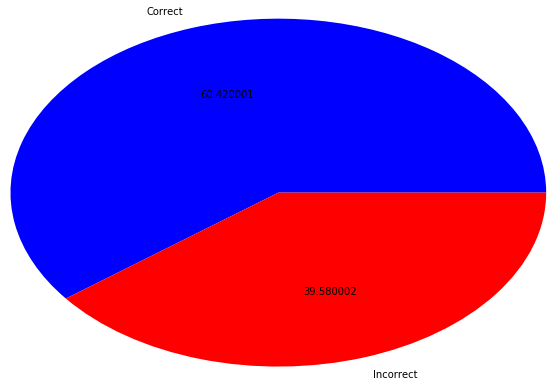

In [1843]:
percents = [accuracy, (100 - accuracy)]
plt.pie(percents, labels=["Correct", "Incorrect"], autopct="%f", colors=["b","r"], radius=2)

plt.show()

# Train Test Split Results

Finally, here I used train_test_split to randomly split the data and predict the age groups that way.

In [1844]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [1845]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=5000)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [1846]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[  3  48   0   0]
 [  1 142   0   0]
 [  2  24   0   0]
 [  0  12   0   0]]


The classification_report gave me the UndefinedMetricWarning and I was unable to find any kind of solution to it.

In [1847]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      0.06      0.11        51
          1       0.63      0.99      0.77       143
          2       0.00      0.00      0.00        26
          3       0.00      0.00      0.00        12

avg / total       0.50      0.62      0.50       232



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy for this method is less consistent than the cross-validation. This could be because the split was more biased, choosing more of certain groups and fewer of other groups and vice versa to train the model.

In [1848]:
accuracy = accuracy_score(y_test, predictions)
accuracy = round(accuracy * 100, 2)

print("Percent accuracy: {accuracy}%".format(accuracy=accuracy))

Percent accuracy: 62.5%


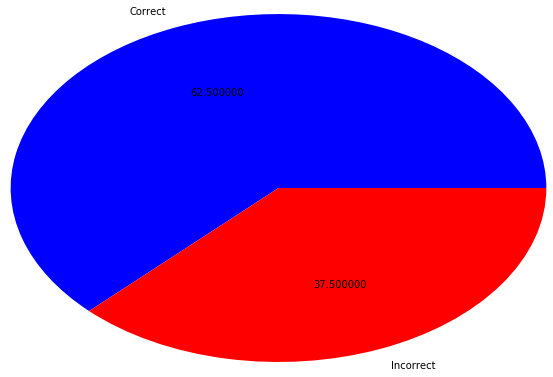

In [1849]:
percents = [accuracy, (100 - accuracy)]
plt.pie(percents, labels=["Correct", "Incorrect"], autopct="%f", colors=["b","r"], radius=2)

plt.show()

# Scatter Plots of Each Music Genre

Provided here are scatter plots of each genre of music compared to the predicted ages to show any corrolation between the sets of data. It doesn't appear that there is any corrolation between these data which would explain why the models weren't able to predict the age groups accurately.

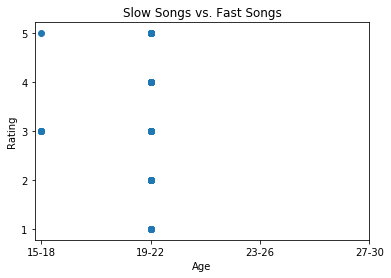

In [1850]:
ageGroups = ["15-18", "19-22", "23-26", "27-30"]
yticks = [1,2,3,4,5]
xticks = [0,1,2,3]
plt.scatter(predictions, X_test['Slow songs or fast songs'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Slow Songs vs. Fast Songs")
plt.show()

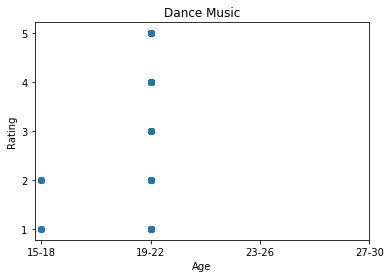

In [1851]:
plt.scatter(predictions, X_test['Dance'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Dance Music")
plt.show()

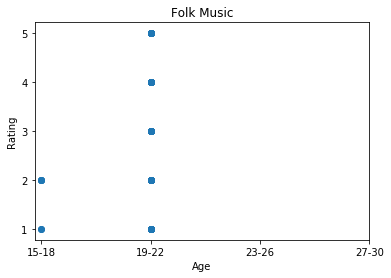

In [1852]:
plt.scatter(predictions, X_test['Folk'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Folk Music")
plt.show()

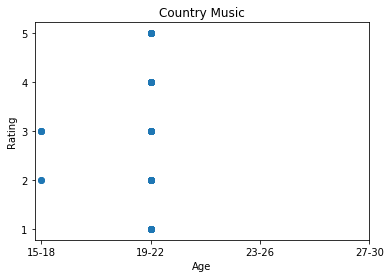

In [1853]:
plt.scatter(predictions, X_test['Country'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Country Music")
plt.show()

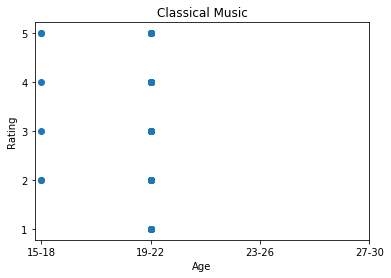

In [1854]:
plt.scatter(predictions, X_test['Classical music'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Classical Music")
plt.show()

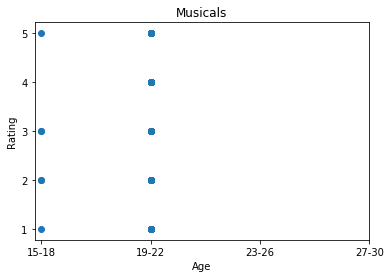

In [1855]:
plt.scatter(predictions, X_test['Musical'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Musicals")
plt.show()

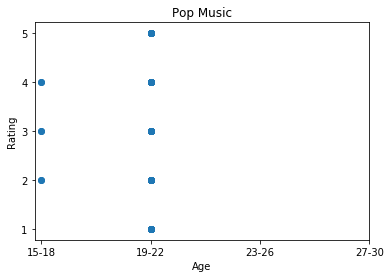

In [1856]:
plt.scatter(predictions, X_test['Pop'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Pop Music")
plt.show()

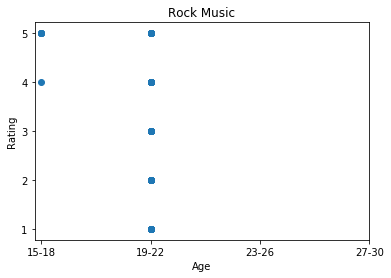

In [1857]:
plt.scatter(predictions, X_test['Rock'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Rock Music")
plt.show()

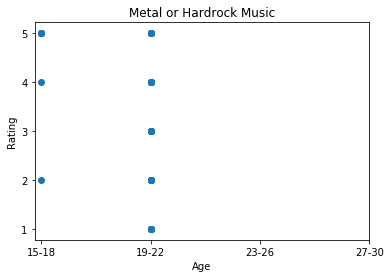

In [1858]:
plt.scatter(predictions, X_test['Metal or Hardrock'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Metal or Hardrock Music")
plt.show()

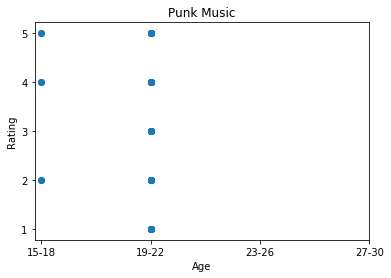

In [1859]:
plt.scatter(predictions, X_test['Punk'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Punk Music")
plt.show()

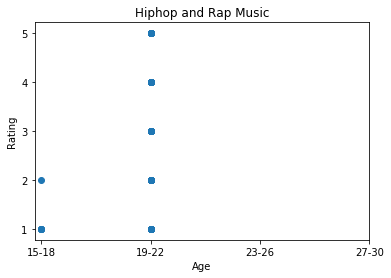

In [1860]:
plt.scatter(predictions, X_test['Hiphop, Rap'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Hiphop and Rap Music")
plt.show()

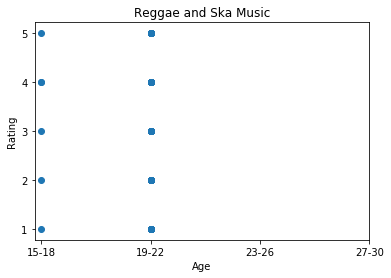

In [1861]:
plt.scatter(predictions, X_test['Reggae, Ska'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Reggae and Ska Music")
plt.show()

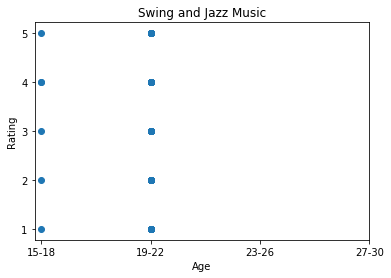

In [1862]:
plt.scatter(predictions, X_test['Swing, Jazz'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Swing and Jazz Music")
plt.show()

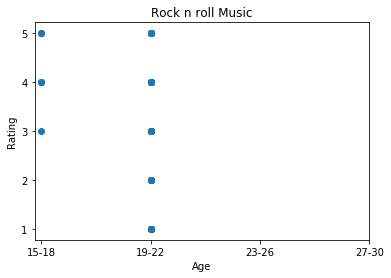

In [1863]:
plt.scatter(predictions, X_test['Rock n roll'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Rock n roll Music")
plt.show()

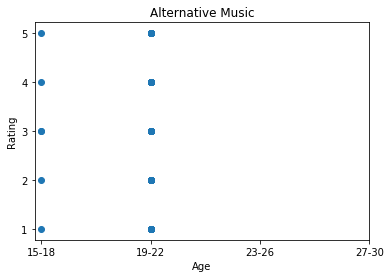

In [1864]:
plt.scatter(predictions, X_test['Alternative'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Alternative Music")
plt.show()

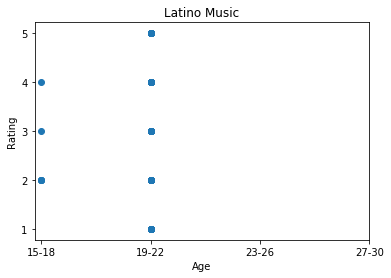

In [1865]:
plt.scatter(predictions, X_test['Latino'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Latino Music")
plt.show()

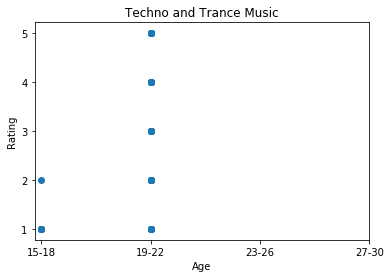

In [1866]:
plt.scatter(predictions, X_test['Techno, Trance'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Techno and Trance Music")
plt.show()

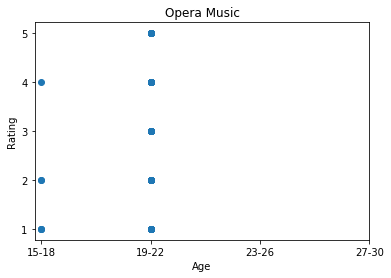

In [1867]:
plt.scatter(predictions, X_test['Opera'])
plt.yticks(yticks)
plt.xticks(xticks, ageGroups)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Opera Music")
plt.show()

# Summary

My conclusion from all of this is that there simply isn't enough of a corrolation in this dataset between age and music interests. The predictions were no better than chance, so that tells me that the models weren't able to find a enough of a corrolation to be able to predict confidently.